# Hyperparameter Tuning Evaluation of DistilBERT Model Training
###
##### Hyperparameter tuning for this DistilBERT model used a 3x3 grid search of training batch size, number of epochs and learning rate with 3 tests for each cell.
##### Hyperparameter tuning is evaluated with two test:
##### 1. Levene's test assesses the equality of variances. Variances are assumed to be equal if the p-value is above 0.05.
##### 2. Welch's ANOVA assesses the equality of means. Means are assumed to be equal if the p-value is above 0.05.

In [1]:
# code for imported libs and df creation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import scipy.stats as stats
from scipy.stats import levene

num_train_epochs={'epochs':[1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1], 
                  'f1':[0.923, 0.926, 0.928, 0.928, 0.925, 0.926, 0.925, 0.927, 0.928, 0.924, 0.930, 0.929, 0.928, 0.927, 0.928, 0.927, 0.931, 0.930, 0.927], 
                  'accuracy':[0.923, 0.926, 0.928, 0.928, 0.925, 0.925, 0.925, 0.927, 0.927, 0.924, 0.929, 0.929, 0.928, 0.926, 0.927, 0.927, 0.931, 0.930, 0.926],
                  'learning_rate':[2e-5, 2e-5, 2e-5, 2e-5, 2e-5, 2e-5, 2e-5, 2e-5, 2e-5, 2e-5, 2e-5, 2e-5, 2e-5, 2e-5, 2e-5, 5e-5, 5e-5, 5e-5, 5e-5], 
                  'train_batch_size':[16, 16, 16, 16, 16, 16, 16, 16, 16, 8, 8, 8, 32, 32, 32, 32, 32, 32, 32]}
df = pd.DataFrame(num_train_epochs)
print('Hyperparameter Tuning Results Dataframe')
df.head()

Hyperparameter Tuning Results Dataframe


,epochs,f1,accuracy,learning_rate,train_batch_size
0,1,0.923,0.923,0.00002,16
1,1,0.926,0.926,0.00002,16
2,1,0.928,0.928,0.00002,16
3,2,0.928,0.928,0.00002,16
4,2,0.925,0.925,0.00002,16


#
## Epoch Number Evaluation
##### There was no statistically significant difference in F1 score between number of epochs.
##### The solid line on the graph represents the mean F1 score. The shaded area is the standard deviation for the sample.

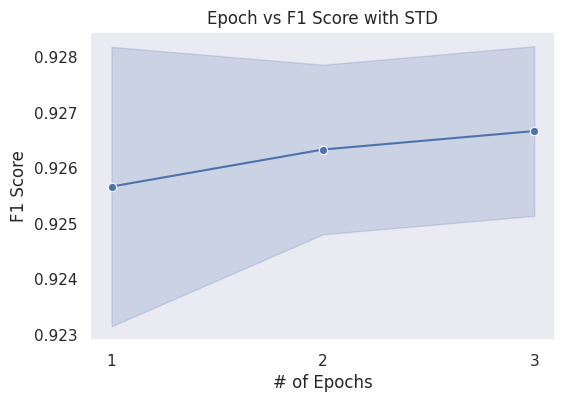

Levene's Test p-value: 0.7461
Welch's ANOVA p-value: 0.8664


In [2]:
# code for epoch evaluation
df_epoch = df[(df['learning_rate'] == 2e-5) & (df['train_batch_size'] == 16)]

sns.set_theme(style="dark")
plt.figure(figsize=(6, 4))
ax =sns.lineplot(x='epochs', y='f1', data=df_epoch, marker='o', 
             estimator=np.mean, errorbar='sd')
plt.title("Epoch vs F1 Score with STD")
plt.xlabel("# of Epochs")
plt.ylabel("F1 Score")
ax.set_xticks([1, 2, 3]) 
#plt.savefig('Epoch vs F1 Score with STD.png', bbox_inches='tight')
plt.show()

epoch_welch = pg.welch_anova(dv='f1', between='epochs', data=df_epoch)
group_names = df_epoch['epochs'].unique()
samples = [df_epoch['f1'][df_epoch['epochs'] == g] for g in group_names]
statistic, p_value = levene(*samples)

print(f"Levene's Test p-value: {p_value:.4f}")
print(f"Welch's ANOVA p-value: {epoch_welch['p-unc'].values[0]:.4f}")

#
## Training Batch Size Evaluation
##### There was no statistically significant difference in F1 score between training batch sizes.
##### The solid line on the graph represents the mean F1 score. The shaded area is the standard deviation for the sample.

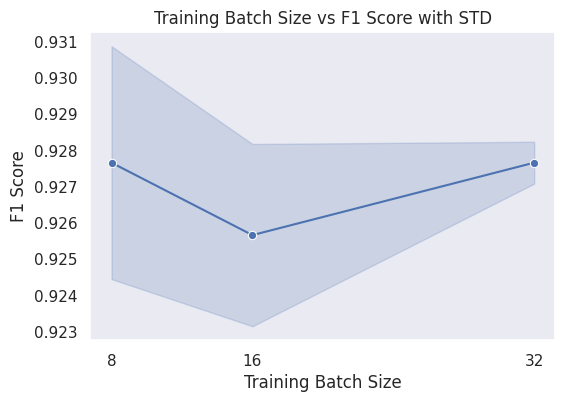

Levene's Test p-value: 0.5227
Welch's ANOVA p-value: 0.5534


In [3]:
# code for training batch size evaluation
df_batch = df[(df['learning_rate'] == 2e-5) & (df['epochs'] == 1)]

sns.set_theme(style="dark")
plt.figure(figsize=(6, 4))
ax =sns.lineplot(x='train_batch_size', y='f1', data=df_batch, marker='o', 
             estimator=np.mean, errorbar='sd')
plt.title("Training Batch Size vs F1 Score with STD")
plt.xlabel("Training Batch Size")
plt.ylabel("F1 Score")
ax.set_xticks([8, 16, 32])
#plt.savefig('Training Batch Size.png', bbox_inches='tight')
plt.show()

training_welch = pg.welch_anova(dv='f1', between='train_batch_size', data=df_batch)
tgroup_names = df_batch['train_batch_size'].unique()
tsamples = [df_batch['f1'][df_batch['train_batch_size'] == g] for g in tgroup_names]
tstatistic, tp_value = levene(*tsamples)

print(f"Levene's Test p-value: {tp_value:.4f}")
print(f"Welch's ANOVA p-value: {training_welch['p-unc'].values[0]:.4f}")

#
## Learning Rate Evaluation
##### There was no statistically significant difference in F1 score between learning rate.
##### The solid line on the graph represents the mean F1 score. The shaded area is the standard deviation for the sample.

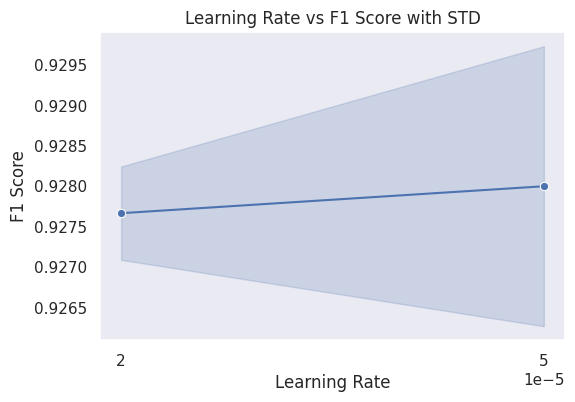

Levene's Test p-value: 0.5614
Welch's ANOVA p-value: 0.7769


In [4]:
# code for learning rate evaluation
df_learn = df[(df['epochs'] == 1) & (df['train_batch_size'] == 32)]

sns.set_theme(style="dark")
plt.figure(figsize=(6, 4))
ax =sns.lineplot(x='learning_rate', y='f1', data=df_learn, marker='o', 
             estimator=np.mean, errorbar='sd')
plt.title("Learning Rate vs F1 Score with STD")
plt.xlabel("Learning Rate")
plt.ylabel("F1 Score")
ax.set_xticks([2e-5, 5e-5])
#plt.savefig('Learning Rate.png', bbox_inches='tight')
plt.show()

learn_welch = pg.welch_anova(dv='f1', between='learning_rate', data=df_learn)
lgroup_names = df_learn['learning_rate'].unique()
lsamples = [df_learn['f1'][df_learn['learning_rate'] == g] for g in lgroup_names]
lstatistic, lp_value = levene(*lsamples)

print(f"Levene's Test p-value: {lp_value:.4f}")
print(f"Welch's ANOVA p-value: {learn_welch['p-unc'].values[0]:.4f}")

#
## Conclusion
##### The distilBERT model was trained on IMDB movie reviews. When the training set contained more than 5000 reviews then the model's F1 score reach ~93%
##### regardless of the hyperparameters. DistilBERT is a pre-trained model. The pre-training is sufficently similar to the IMDB reviews that not much
##### additional training is necessary to produce a stable, robust model.